# 4th Year Project: Testground
`
Last Modified: 26th January 2020
Author: Ken Yew Piong
UCL ID: 16004444
`
```python
# DEVELOPER NOTES
prosuplvl0-forearm
22.4,28.56,49.7,57.65,78.5,88.9
```

---
## Library Import

In [1]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft, ifft, fftfreq
from scipy import signal 
from util import *

%matplotlib inline
mpld3.enable_notebook()

importing Jupyter notebook from util.ipynb


---
## 1.0 Global Parameters for Plot Customisation

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 24,
          'legend.loc': 'best',
          'figure.figsize': (17, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}

# Update plot customisation parameters
pylab.rcParams.update(params)

---
## 2.0 Data Import

In [3]:
working_path = get_folder_path('prosup-wrist')
print(working_path)
os.chdir(working_path)
file = 'prosup-lvl0-wrist_S2_2019-12-10T15.13.45.631_C49948A1895C_Accelerometer_1.4.5.csv'
df = read_csv_file(file)
os.chdir('..')

C:\Users\User\Desktop\4th_year_project\Parkinson-Disease-Repository\Testground\Test 3 - Chin Yang Playground\Ken_Test1\Patient001-2019-12-05\prosup-wrist


--- 
## 3.0 Testground

In [4]:
df

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1575990825631,2019-12-10T15:13:45.631,0.000,-0.332,0.150,-0.987
1,1575990825651,2019-12-10T15:13:45.651,0.020,-0.346,0.159,-1.034
2,1575990825672,2019-12-10T15:13:45.672,0.041,-0.317,0.148,-1.012
3,1575990825691,2019-12-10T15:13:45.691,0.060,-0.332,0.138,-0.988
4,1575990825711,2019-12-10T15:13:45.711,0.080,-0.404,0.146,-0.972
...,...,...,...,...,...,...
4915,1575990923320,2019-12-10T15:15:23.320,97.689,-0.311,0.070,-1.010
4916,1575990923339,2019-12-10T15:15:23.339,97.708,-0.309,0.070,-1.012
4917,1575990923359,2019-12-10T15:15:23.359,97.728,-0.314,0.064,-1.011
4918,1575990923380,2019-12-10T15:15:23.380,97.749,-0.310,0.066,-1.014


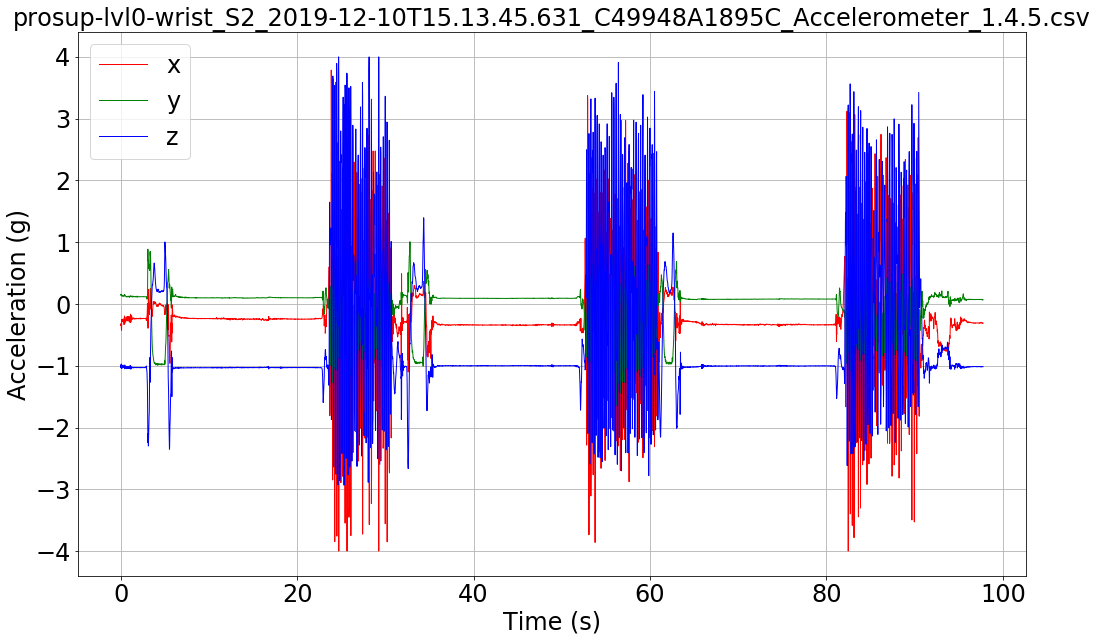

In [5]:
plot_time_3_axes(df, file)

---
### 3.1 Truncated Data Inspection

C:\Users\User\Anaconda3\envs\virtualcy\lib\site-packages\scipy\fft\_pocketfft\helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


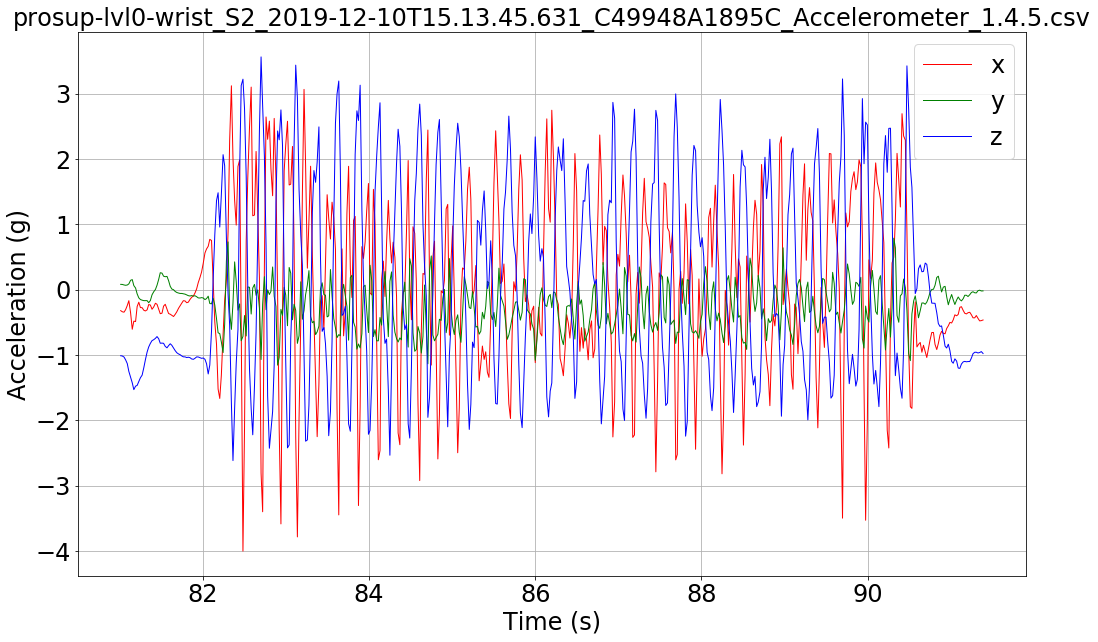

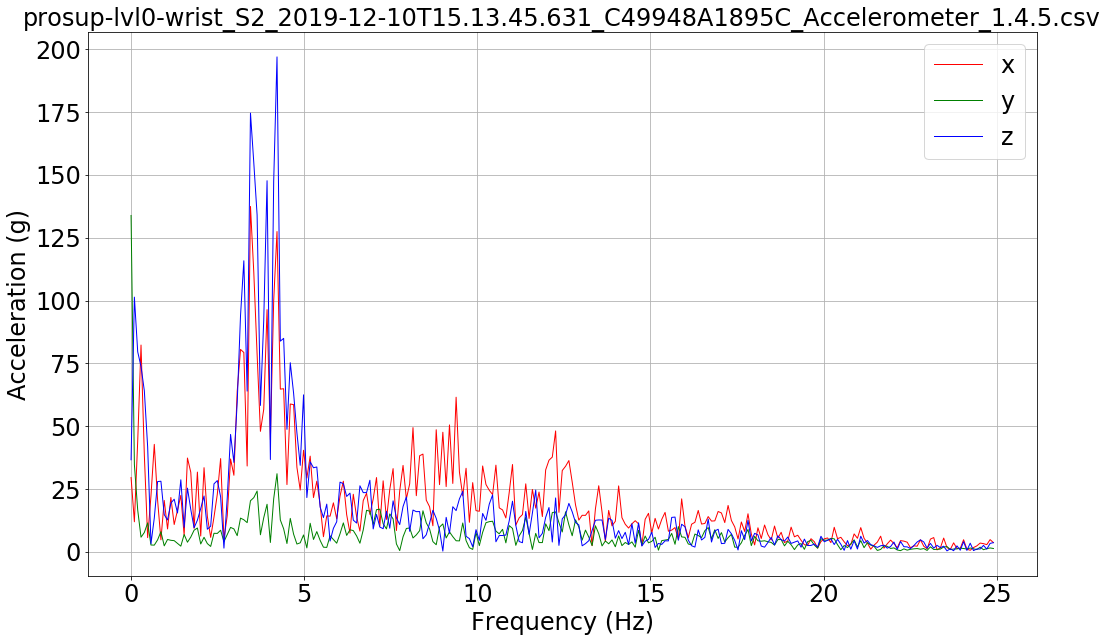

In [6]:
# ==============================================
# Truncated Data Analysis
# ==============================================
working_path = get_folder_path('prosup-wrist')
file = 'prosup-lvl0-wrist_S2_2019-12-10T15.13.45.631_C49948A1895C_Accelerometer_1.4.5.csv'
os.chdir(working_path)

# Data pre-processing
df = read_csv_file(os.path.join(working_path,file))
os.chdir('..')
df_1, df_2, df_3 = truncate_dataframe(working_path, file, 22.5, 31.5, 52, 61.2, 81, 91.4)

# plot_time_3_axes(df_1, t = file)
# plot_time_3_axes(df_2, t = file)
plot_time_3_axes(df_3, t = file)

fs = 50
# plot_frequency(df_1, fs, t = file)
# plot_frequency(df_2, fs, t = file)
plot_frequency(df_3, fs, t = file)

In [7]:
df_3

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
4076,1575990906644,2019-12-10T15:15:06.644,81.013,-0.320,0.082,-1.010
4077,1575990906663,2019-12-10T15:15:06.663,81.032,-0.337,0.081,-1.014
4078,1575990906684,2019-12-10T15:15:06.684,81.053,-0.344,0.073,-1.030
4079,1575990906703,2019-12-10T15:15:06.703,81.072,-0.306,0.068,-1.073
4080,1575990906723,2019-12-10T15:15:06.723,81.092,-0.242,0.072,-1.130
...,...,...,...,...,...,...
4594,1575990916939,2019-12-10T15:15:16.939,91.308,-0.395,-0.049,-0.957
4595,1575990916959,2019-12-10T15:15:16.959,91.328,-0.438,-0.015,-0.968
4596,1575990916979,2019-12-10T15:15:16.979,91.348,-0.477,-0.007,-0.961
4597,1575990916999,2019-12-10T15:15:16.999,91.368,-0.473,-0.019,-0.947


In [8]:
lpf=signal.firwin(155, 7/50, window='hamming')
pd.DataFrame(signal.convolve(df.iloc[:, 3], lpf, mode='same'))

,0
0,-0.203499
1,-0.249391
2,-0.288637
3,-0.318576
4,-0.337590
...,...
4915,-0.311893
4916,-0.288829
4917,-0.257772
4918,-0.220167


In [9]:
# lst = ['apples', 'bananas', 'oranges']
# for idx, elem in enumerate(lst): 
#     print(idx, elem)

col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
for idx, elem in enumerate(col_name):
    print(col_name[idx])

filtered x-axis (g)
filtered y-axis (g)
filtered z-axis (g)


---
### 3.2 Filters

In [20]:
f_size = 155
fs = 50
cutoff = 7

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
# median_data=median_filter(df_3, f_size)
# lpf_data=freq_filter(df_3, f_size, cutoff/fs)
# comb_data=freq_filter_recursive(median_data, f_size, cutoff/fs)
def freq_filter_df(df, f_size, cutoff):
    select_cols=[3, 4, 5]
    if 'Accelerometer' in file: 
        col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
    elif 'Gyroscope' in file: 
        col_name = ['filtered x-axis (deg/s)', 'filtered y-axis (deg/s)', 'filtered z-axis (deg/s)']
    lpf=signal.firwin(f_size, cutoff, window='hamming')

    for idx, col in enumerate(select_cols):
        df[col_name[idx]] = pd.DataFrame(signal.convolve(df.iloc[:, col], lpf, mode='same'))
    
    return df

lpf_data = freq_filter_df(df_3, f_size, cutoff/fs)

# ==============================================
# Low Pass Filter Plots
# ==============================================
# plot_time_3_axes(lpf_data, t = "LPF: " + file)
# plot_frequency(lpf_data, fs, t = "LPF: " + file)

# def freq_filter(df, f_size, cutoff):
#     select_cols=[3, 4, 5]
#     lgth, num_signal=df.shape
#     f_data=np.zeros([lgth, num_signal])
#     lpf=signal.firwin(f_size, cutoff, window='hamming')
#     for idx, col in enumerate(select_cols): 
#         f_data[:,idx]=signal.convolve(df.iloc[:,col], lpf, mode='same')
#     return f_data

"""
# ==============================================
# Median Pass Filter Plots
# ==============================================
plot_time_3_axes(median_data, t = "Median Filter: " + file)
plot_frequency_recursive(median_data, fs, t = "Median Filter: " + file)
"""

"""
# ==============================================
# Combined (Low + Median) Pass Filter Plots
# ==============================================
plot_time_3_axes(comb_data, t = "Combined Filter: " + file)
plot_frequency_recursive(comb_data, fs, t = "Combined Filter: " + file)
"""
"""
# ==============================================
# Integrated Signals Plots
# ==============================================
integrated_data = acc_integration(df)
plot_time_3_axes(integrated_data, t = "Integrated Signal (Velocity): " + file)
"""

'\n# ==============================================\n# Integrated Signals Plots\n# ==============================================\nintegrated_data = acc_integration(df)\nplot_time_3_axes(integrated_data, t = "Integrated Signal (Velocity): " + file)\n'

In [11]:
lpf_data

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),filtered x-axis (g),filtered y-axis (g),filtered z-axis (g)
4076,1575990906644,2019-12-10T15:15:06.644,81.013,-0.320,0.082,-1.010,NaN,NaN,NaN
4077,1575990906663,2019-12-10T15:15:06.663,81.032,-0.337,0.081,-1.014,NaN,NaN,NaN
4078,1575990906684,2019-12-10T15:15:06.684,81.053,-0.344,0.073,-1.030,NaN,NaN,NaN
4079,1575990906703,2019-12-10T15:15:06.703,81.072,-0.306,0.068,-1.073,NaN,NaN,NaN
4080,1575990906723,2019-12-10T15:15:06.723,81.092,-0.242,0.072,-1.130,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4594,1575990916939,2019-12-10T15:15:16.939,91.308,-0.395,-0.049,-0.957,NaN,NaN,NaN
4595,1575990916959,2019-12-10T15:15:16.959,91.328,-0.438,-0.015,-0.968,NaN,NaN,NaN
4596,1575990916979,2019-12-10T15:15:16.979,91.348,-0.477,-0.007,-0.961,NaN,NaN,NaN
4597,1575990916999,2019-12-10T15:15:16.999,91.368,-0.473,-0.019,-0.947,NaN,NaN,NaN


In [12]:
lpf_data.head()

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),filtered x-axis (g),filtered y-axis (g),filtered z-axis (g)
4076,1575990906644,2019-12-10T15:15:06.644,81.013,-0.320,0.082,-1.010,NaN,NaN,NaN
4077,1575990906663,2019-12-10T15:15:06.663,81.032,-0.337,0.081,-1.014,NaN,NaN,NaN
4078,1575990906684,2019-12-10T15:15:06.684,81.053,-0.344,0.073,-1.030,NaN,NaN,NaN
4079,1575990906703,2019-12-10T15:15:06.703,81.072,-0.306,0.068,-1.073,NaN,NaN,NaN
4080,1575990906723,2019-12-10T15:15:06.723,81.092,-0.242,0.072,-1.130,NaN,NaN,NaN


In [13]:
# f_size = 155
# cutoff_divide_by_fs = 7/50

# select_cols=[3, 4, 5]
# if 'Accelerometer' in file: 
#     col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
# elif 'Gyroscope' in file: 
#     col_name = ['filtered x-axis (deg/s)', 'filtered y-axis (deg/s)', 'filtered z-axis (deg/s)']

# lpf=signal.firwin(f_size, cutoff_divide_by_fs, window='hamming')

# for idx, col in enumerate(select_cols):
#     df[col_name[idx]] = pd.DataFrame(signal.convolve(df.iloc[:, col], lpf, mode='same'))
    
def freq_filter_df(df, f_size, cutoff):
    select_cols=[3, 4, 5]
    if 'Accelerometer' in file: 
        col_name = ['filtered x-axis (g)', 'filtered y-axis (g)', 'filtered z-axis (g)']
    elif 'Gyroscope' in file: 
        col_name = ['filtered x-axis (deg/s)', 'filtered y-axis (deg/s)', 'filtered z-axis (deg/s)']
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    
    for idx, col in enumerate(select_cols):
        df[col_name[idx]] = pd.DataFrame(signal.convolve(df.iloc[:, col], lpf, mode='same'))
        
    return df

---
### 3.3 Bandpass Filters

In [14]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 50
lowcut = 1
highcut = 7
order = 5

b, a = butter_bandpass(lowcut, highcut, fs, order=order)
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=order)

NameError: name 'butter' is not defined

---
## 4.0 Archive Code

In [ ]:
x = df_1['x-axis resultant (g)']
X = fft(x)
f_s = 50
freqs = fftfreq(len(x)) * f_s

# fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(freqs, np.abs(X))
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = file, xlim = [-f_s / 2, f_s / 2], ylim = [-5, 110])

In [ ]:
def plot_fft(df, fs, t = ''):
    # Create mapping lists
    select_cols=[3, 4, 5]
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    lgth, num_signal=df.shape
    fqy = np.zeros([lgth, num_signal])
    
    # Perform FFT on data and store in matrix
    for idx, col in enumerate(select_cols): 
        fqy[:,idx] = np.abs(fft(df.iloc[:, col]))

    index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = t) # xlim = [0, fs/2] 
    ax.grid(b=True, which='both')
    
    # Plot 
    for i in range(3):
        ax.stem(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])

    ax.legend()

In [ ]:
fs = 50
plot_fft(df_1, fs, t = file)
plot_fft(df_2, fs, t = file)
plot_fft(df_3, fs, t = file)

In [ ]:
# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

In [ ]:
# ======================================================================
# Edit the input variable below to change to the folder path of interest
# ======================================================================
working_path = get_folder_path('tota-calf&heel')

# Data Overview
display(working_path)
df_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)
# display(df_tabulated_stats)

# File and directory management
os.chdir(working_path)
directory = os.listdir()

for file in directory:
    display(file)
    df = read_csv_file(file)
    if df is None:
        continue

    # ==============================================
    # Data Pre-processing
    # ==============================================
    df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
    display(df_raw_stats)
    
#     df_processed = process_dataframe(df, file, window, max_window) 
#     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
#     display(df_processed_stats)
    
    # ==============================================
    # Data Visualisation
    # ==============================================
    # Update plot customisation parameters
    pylab.rcParams.update(params)
    
    # Uncomment sections below to enable plots of interest
    plot_time_3_axes(df, t = file)
#     plot_magnitude_frequency(df_processed, t = file)
#     plot_frequency(df, fs, t = file)

os.chdir('..')